In [1]:
# pip install numpy matplotlib tensorflow --user
import tensorflow as tf
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
def load_data(fname):
    D = np.loadtxt(fname)
    X = D[:, :-1]
    y = D[:, -1]
    return X, y

def grid2d(start, end, num=50):
    dom = np.linspace(start, end, num)
    X0, X1 = np.meshgrid(dom, dom)
    return np.column_stack([X0.flatten(), X1.flatten()])

In [3]:
dataFname = 'data/data2Class.txt'
X_data, y_data = load_data(dataFname);

In [104]:
tf.reset_default_graph()

In [105]:
sess = tf.Session()

op_L1 = tf.layers.Dense(100, 
                     activation=tf.nn.leaky_relu, 
                     kernel_initializer=tf.initializers.random_uniform(-.1,.1), 
                     bias_initializer=tf.initializers.random_uniform(-.1,.1))

op_L2 = tf.layers.Dense(1, 
                     activation=tf.nn.leaky_relu,
                     kernel_initializer=tf.initializers.random_uniform(-.1,.1), 
                     bias_initializer=tf.initializers.random_uniform(-.001,.001))

var_x = tf.placeholder(shape=[None,2], dtype=tf.float32)  # where the X_data is fed in
var_y = tf.placeholder('float') # where the y_data is fed in

var_x1 = op_L1(var_x)
var_f = op_L2(var_x1)

In [106]:
# var_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=var_f, labels=var_y))
var_loss = tf.reduce_mean(tf.losses.hinge_loss(logits=var_f, labels=var_y))
#correct_pred = tf.equal(tf.argmax(f, 1), tf.argmax(y, 1))
#accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
op_optimizer = tf.train.AdamOptimizer().minimize(var_loss)

In [107]:
sess.run(tf.global_variables_initializer())

In [117]:
num_steps = 20
for step in range(1, num_steps+1):
    sess.run(op_optimizer, feed_dict={var_x: X_data, var_y: y_data})
    loss = sess.run([var_loss], feed_dict={var_x: X_data, var_y: y_data})
    print("Step ", str(step), loss)

Step  1 [1.0000024]
Step  2 [1.0000024]
Step  3 [1.0000024]
Step  4 [1.0000024]
Step  5 [1.0000024]
Step  6 [1.0000024]
Step  7 [1.0000024]
Step  8 [1.0000024]
Step  9 [1.0000024]
Step  10 [1.0000024]
Step  11 [1.0000024]
Step  12 [1.0000024]
Step  13 [1.0000024]
Step  14 [1.0000024]
Step  15 [1.0000024]
Step  16 [1.0000024]
Step  17 [1.0000024]
Step  18 [1.0000024]
Step  19 [1.0000024]
Step  20 [1.0000024]


In [99]:
predictions = sess.run(var_f, feed_dict={var_x: X_data})

In [100]:
np.savetxt(fname='z.output', X=predictions)

In [ ]:
# WHY IS THE OUTPUT ALL ZERO?

# HOW CAN I TRAIN ON HINGE LOSS?

# HOW CAN I PLOT THINGS?

In [ ]:
beta = ridgeRegression(features, y_data, 0.01)

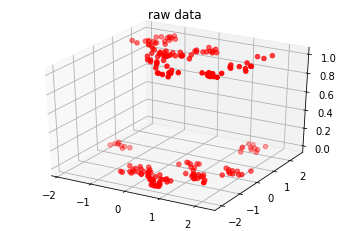

In [72]:
# 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # the projection arg is important!
ax.scatter(X_data[:, 0], X_data[:, 1], y_data, color="red")
ax.set_title("raw data")
plt.draw()

In [ ]:
X_grid = grid2d(-3, 3, num=30)
X_grid_feat = sess.run(y, feed_dict={x: X_grid})

# Predict with trained model
y_grid = np.dot(X_grid_feat, beta)
print("Y_grid.shape", y_grid.shape)
# vis the result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # the projection part is important
ax.scatter(X_grid[:, 0], X_grid[:, 1], y_grid) # dont use the 1 infront
ax.scatter(X_data[:, 0], X_data[:, 1], y_data, color="red") # also show the real data
ax.set_zlim([-5, 2])
ax.set_title("predicted data")
plt.show()